## EDA

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice


In [22]:
df = pd.read_excel("Maids.cc_Data_Analyst_Test_Dataset.xlsx")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ContractID         200 non-null    object        
 1   ContractStartDate  200 non-null    datetime64[ns]
 2   Plan Type          200 non-null    object        
 3   DateOfCancelation  157 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 6.4+ KB


In [24]:
df.head()

ContractID ContractStartDate Plan Type DateOfCancelation
0  Cont_10533        2019-01-02   Plan #1               NaT
1  Cont_10091        2019-01-02   Plan #3        2019-11-30
2  Cont_10214        2019-01-03   Plan #2        2019-05-26
3  Cont_10352        2019-01-03   Plan #1               NaT
4  Cont_10231        2019-01-05   Plan #1        2020-07-14

In [25]:
df["Plan Type"].unique().sum()

'Plan #1Plan #3Plan #2'

In [26]:
df["DateOfCancelation"].isnull().sum()

43

In [27]:
df_ongoing_contracts = df[df["DateOfCancelation"].isnull()]
df_ongoing_contracts.head()

ContractID ContractStartDate Plan Type DateOfCancelation
0   Cont_10533        2019-01-02   Plan #1               NaT
3   Cont_10352        2019-01-03   Plan #1               NaT
8   Cont_10343        2019-01-15   Plan #3               NaT
11  Cont_10644        2019-01-22   Plan #3               NaT
13  Cont_10665        2019-01-29   Plan #2               NaT

In [28]:
df_canceled_contracts = df[df["DateOfCancelation"].notnull()]
df_canceled_contracts.head()

ContractID ContractStartDate Plan Type DateOfCancelation
1  Cont_10091        2019-01-02   Plan #3        2019-11-30
2  Cont_10214        2019-01-03   Plan #2        2019-05-26
4  Cont_10231        2019-01-05   Plan #1        2020-07-14
5  Cont_10780        2019-01-06   Plan #2        2020-10-18
6  Cont_10005        2019-01-07   Plan #2        2020-02-20

In [9]:
df_canceled_contracts.groupby("Plan Type").count()["ContractID"]

Plan Type
Plan #1    48
Plan #2    57
Plan #3    52
Name: ContractID, dtype: int64

## Visulization

<AxesSubplot:xlabel='Plan Type', ylabel='count'>

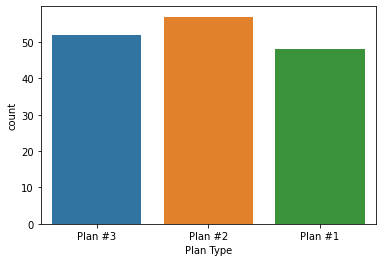

In [10]:
sns.countplot(x="Plan Type", data=df_canceled_contracts)

<AxesSubplot:xlabel='Plan Type', ylabel='count'>

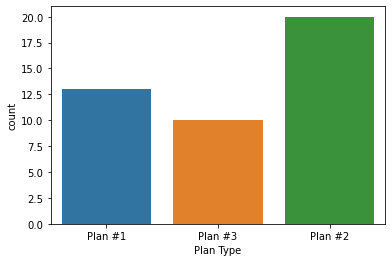

In [11]:
sns.countplot(x="Plan Type", data=df_ongoing_contracts)

## Handling the on going contracts

In [12]:
df["DateOfCancelation"].fillna("2021-12-31", inplace=True)
df

ContractID ContractStartDate Plan Type DateOfCancelation
0    Cont_10533        2019-01-02   Plan #1        2021-12-31
1    Cont_10091        2019-01-02   Plan #3        2019-11-30
2    Cont_10214        2019-01-03   Plan #2        2019-05-26
3    Cont_10352        2019-01-03   Plan #1        2021-12-31
4    Cont_10231        2019-01-05   Plan #1        2020-07-14
..          ...               ...       ...               ...
195  Cont_10330        2019-12-25   Plan #3        2021-01-30
196  Cont_10086        2019-12-26   Plan #3        2021-07-17
197  Cont_10114        2019-12-29   Plan #1        2021-01-08
198  Cont_10190        2019-12-29   Plan #1        2021-11-27
199  Cont_10661        2019-12-29   Plan #1        2021-12-31

[200 rows x 4 columns]

In [13]:
df["ContractMonths"] = (df["DateOfCancelation"] - df["ContractStartDate"])//np.timedelta64(1, 'M')
df["ContractYears"] = (df["DateOfCancelation"] - df["ContractStartDate"])/np.timedelta64(1, 'Y')


In [14]:
df[df["Plan Type"] == "Plan #3"]["ContractYears"]

1      0.908985
7      1.815232
8      2.959677
9      1.308720
11     2.940512
         ...   
177    0.988384
184    1.954866
189    0.109516
195    1.100639
196    1.557869
Name: ContractYears, Length: 62, dtype: float64

## Calculation of revnue per plan

In [15]:
import math

plan1= lambda m: (m*75 + (m//12)*200)

plan2= lambda y: 800*math.ceil(y)

def plan3(y):
    y= math.floor(y)
   
    if y%2==0:
        return (1+ y//2)*1300 + (y//2)*150
    else:
        return (1+ (y//2))*1300+((y+1)/2)*150
         
        
# plan1(22)

In [16]:
df.loc[df["Plan Type"]=="Plan #1", "Revenue per plan"] = df["ContractMonths"].apply(plan1)
df.loc[df["Plan Type"]=="Plan #2", "Revenue per plan"] = df["ContractYears"].apply(plan2)
df.loc[df["Plan Type"]=="Plan #3", "Revenue per plan"] = df["ContractYears"].apply(plan3)

df.head()

ContractID ContractStartDate Plan Type DateOfCancelation  ContractMonths  \
0  Cont_10533        2019-01-02   Plan #1        2021-12-31              35   
1  Cont_10091        2019-01-02   Plan #3        2019-11-30              10   
2  Cont_10214        2019-01-03   Plan #2        2019-05-26               4   
3  Cont_10352        2019-01-03   Plan #1        2021-12-31              35   
4  Cont_10231        2019-01-05   Plan #1        2020-07-14              18   

   ContractYears  Revenue per plan  
0       2.995270            3025.0  
1       0.908985            1300.0  
2       0.391521             800.0  
3       2.992532            3025.0  
4       1.522276            1550.0

<AxesSubplot:title={'center':'The average of revenu per plan'}, ylabel='Plan Type'>

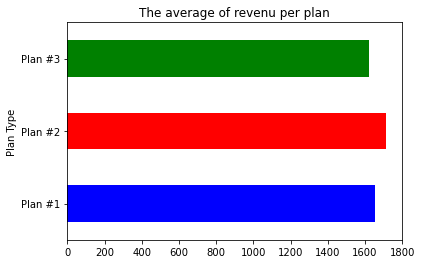

In [17]:
df_result = df.groupby("Plan Type")["Revenue per plan"]
my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(df_result)))
df_result.mean().plot.barh(title="The average of revenu per plan", color=my_colors )

<AxesSubplot:title={'center':'The summation of revenu per plan'}, ylabel='Plan Type'>

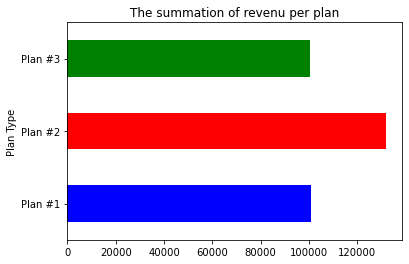

In [18]:
df_result.sum().plot.barh(title="The summation of revenu per plan", color=my_colors )

the most revenu came from plan 2.

In [19]:
df.to_excel("results.xlsx")